# 归一化

In [1]:
# 最大最小归一化（0，1）
def min_max_normalization(data):
    min_val = min(data)
    max_val = max(data)
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized_data

In [2]:
# 最大最小归一化（-1，1）
def min_max_normalization(data):
    min_val = min(data)
    max_val = max(data)
    normalized_data = [2 * (x - min_val) / (max_val - min_val) - 1 for x in data]
    return normalized_data

In [3]:
# 概率归一化
def sum_normalization(data):
    total_sum = sum(data)
    if total_sum == 0:
        raise ValueError("Sum of data is zero, cannot perform sum normalization.")
    normalized_data = [x / total_sum for x in data]
    return normalized_data

In [4]:
# Z-Score归一化
import numpy as np

def z_score_normalization(data):
    mean_val = np.mean(data)
    std_dev = np.std(data)
    normalized_data = [(x - mean_val) / std_dev for x in data]
    return normalized_data

In [5]:
# 对数归一化
import math

def log_normalization(data):
    normalized_data = [math.log10(x) for x in data]
    min_val = min(normalized_data)
    max_val = max(normalized_data)
    normalized_data = [(x - min_val) / (max_val - min_val) for x in normalized_data]
    return normalized_data

中心化对数比变换具有以下优点：
它保持了组成数据的内部比例关系。
它可以减少数据的偏态分布，使数据更加接近正态分布。
它可以用来解决组成数据的闭合性问题，即各组成部分的和为常数的问题。
它有助于在多变量分析中减少维度和消除相关性，使得变量间的比较和分析更加合理。

中心化对数比变换的缺点包括：
对数变换要求所有数据都必须大于零，这在实际应用中可能需要数据的预处理。
当数据中存在零值时，需要进行特殊的处理（例如加一个小常数）。
变换后的数据可能不易于解释，因为它们已经不再具有原始数据的直接意义。

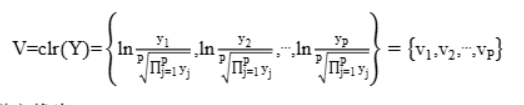

In [1]:
# 中心化对数变换（Centered Log-Ratio Transformation，简称CLR变换）
import numpy as np

def centered_log_ratio_transformation(data):
    geometric_mean = np.exp(np.mean(np.log(data[data > 0])))
    clr_transformed = np.log(data / geometric_mean)
    return clr_transformed

data = np.array([0.2, 0.3, 0.5])
clr_data = centered_log_ratio_transformation(data)

print("原始数据:", data)
print("CLR变换后的数据:", clr_data)

原始数据: [0.2 0.3 0.5]
CLR变换后的数据: [-0.44058528 -0.03512017  0.47570545]


非对称对数比变换——ALR 变换
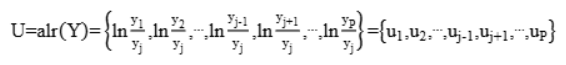

In [4]:
# 非对称对数比变换————ALR变换
import numpy as np

def Additive_Log_Ratio_transformation(data, i):
    alr_transformed = np.log(data / data[i])
    alr_transformed = np.delete(alr_transformed, i)
    return alr_transformed

data = np.array([0.2, 0.3, 0.5])
clr_data = Additive_Log_Ratio_transformation(data,1)

print("原始数据:", data)
print("CLR变换后的数据:", clr_data)

原始数据: [0.2 0.3 0.5]
CLR变换后的数据: [-0.40546511  0.51082562]


以上两种方法都会涉及到成分数据中存在大量的0，具体情况具体讨论

相关文献可以参考：
https://kns.cnki.net/reader/flowpdf?invoice=IFxRtDC14LsEDkGjD7Ly1pwjxwib7Ykvndo7FPtjkSFKlo4qhPtjm%2BqzHB9L%2BCEJd%2FXeYGEJhEdpTkC2cTULgSssaVHRoRdt42jnqoc6JwHHKY%2Bzv76kSWNk62%2Bcn0aqjkPfRouJx7Rzwi7Bst3dlx8RP5YhX35A0Rmfs2uPkZ4%3D&platform=NZKPT&product=CMFD&filename=1023508704.nh&tablename=cmfd202401&type=DISSERTATION&scope=trial&cflag=pdf&dflag=pdf&pages=&language=CHS&trial=&nonce=1C95F815395A4FC59A0FFFD6559F1585

https://kns.cnki.net/reader/flowpdf?invoice=PSueTv%2Bn6ndpFSLCREPq9ZhWSHlZiJm4QxnJNfN%2BbugqOU%2FnckLRUrWdFqvyTsL%2FalcVKdM71eJ%2BsSto2mBtiU10mrdTgjcsEJFDFdfQQI1QVML3Bk8geWFV0%2FD496QlV0Vj30P%2FwWnUHWdEw5COU2ym%2BHG8BDWfkEqpfTiMPHs%3D&platform=NZKPT&product=CMFD&filename=1020346227.nh&tablename=cmfd202002&type=DISSERTATION&scope=trial&cflag=pdf&dflag=pdf&pages=&language=CHS&trial=&nonce=FC46083439B1457883310628D8FF3F3F

In [5]:
# 还有一种ILR变换

In [6]:
# Sigmoid归一化
def sigmoid_normalization(data):
    normalized_data = [1 / (1 + math.exp(-x)) for x in data]
    return normalized_data

In [7]:
# 小数定标归一化
def decimal_scaling_normalization(data):
    max_val = max(abs(x) for x in data)
    j = int(math.floor(math.log10(max_val))) + 1
    normalized_data = [x / (10 ** j) for x in data]
    return normalized_data

In [8]:
# 批归一化
import torch
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.bn = nn.BatchNorm1d(num_features=10)  # 假设输入特征为10，这是一个批归一化层，

    def forward(self, x):
        x = self.bn(x)
        return x

# 创建一个网络实例
net = SimpleNet()

# 生成一些随机数据
data = torch.randn(32, 10)  # 假设一个包含32个样本的小批量数据

# 前向传播
output = net(data)


ModuleNotFoundError: No module named 'torch'

# 离散化

> 分箱一般都是针对连续型数据（如价格、销量、年龄）进行的。但是从理论上，分箱也可以对分类型数据进行。比如，有些分类型数据可取的值非常多，像中国的城市这种数据，这种情况下可以通过分箱，让已经是离散型的数据变得更加离散，比如，城市可以被划分为一级城市、二级城市、三级城市，或者把垃圾分为有害垃圾、可回收垃圾、湿垃圾、干垃圾等等。                          
> 原文链接：https://blog.csdn.net/Orange_Spotty_Cat/article/details/116485079  
> 分箱可以让数据更加稳定，增加泛化能力；还能加快模型的处理速度

In [ ]:
# 对于分类型特征，考虑它的分类特征数目和顺序


> 连续型特征的无监督学习包括等宽和等频

In [9]:
import pandas as pd

# 导入一列数据
df = pd.DataFrame({'年龄': [29,7,49,12,50,34,36,75,61,20,3,11]})

df['等距分箱'] = pd.cut(df['年龄'] ,4)    # 实现等距分箱，分为4个箱
df['等频分箱'] = pd.qcut(df['年龄'],4)    # 实现等频分箱，分为4个箱

> 有监督分箱包括决策树分箱和卡方分箱  
> 决策树分箱的原理其实就是用要进行分箱的这个特征与Y进行决策树的拟合，决策树训练后的结果会提供内部节点的阈值，这个阈值就会成为分箱的边界。

[INFO] creating woe binning ...


D:\anaconda\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_bin = dtm.groupby('bin', group_keys=False)['y'].agg([n0, n1])\
D:\anaconda\Lib\site-packages\scorecardpy\woebin.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binning = dtm.groupby(['variable','bin'], group_keys=False)['y'].agg([n0, n1])\
D:\anaconda\Lib\site-packages\scorecardpy\woebin.py:361: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 

{'年龄': <Figure size 640x480 with 2 Axes>}

D:\anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  func(*args, **kwargs)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


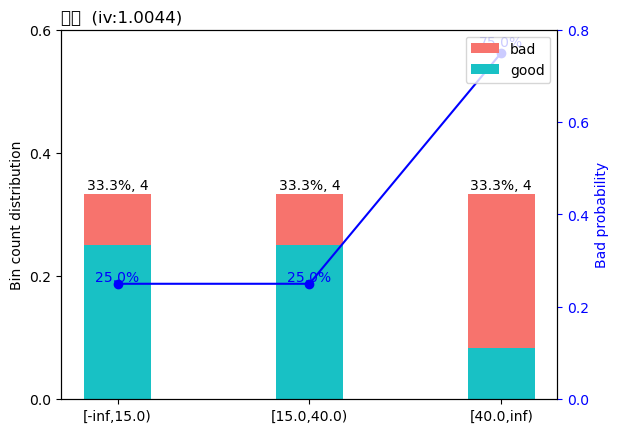

In [10]:
# 决策树分箱
import pandas as pd
import scorecardpy as sc
 
# 导入两列数据
df = pd.DataFrame({'年龄': [29,7,49,12,50,34,36,75,61,20,3,11],
                   'Y'   : [0,0,1,1,0,1,0,1,1,0,0,0]})
bins = sc.woebin(df, y='Y', method='tree')  # 决策树分箱
sc.woebin_plot(bins)

> 在这里其实就是对两个相邻的区间进行卡方检验，检测它们是否存在分布上的差异。通过卡方分箱得到的箱数是通过预先设定的阈值决定，这个方法有点类似合并同类项，算法会将具有最小卡方值的区间与相邻的最小卡方区间进行合并，合并到分箱个数达到阈值为止。

In [11]:
# 卡方分箱
def tagcount(series,tags):
    """
    统计该series中不同标签的数量，可以针对多分类
    series:只含有标签的series
    tags:为标签的列表，以实际为准，比如[0,1],[1,2,3]
    """
    result = []
    countseries = series.value_counts()
    for tag in tags:
        try:
            result.append(countseries[tag])
        except:
            result.append(0)
    return result
            


def ChiMerge3(df, num_split,tags=[1,2,3],pvalue_edge=0.1,biggest=10,smallest=3,sample=None):  
    """
    df:只包含要分箱的参数列和标签两列
    num_split:初始化时划分的区间个数,适合数据量特别大的时候。
    tags：标签列表，二分类一般为[0,1]。以实际为准。
    pvalue_edge：pvalue的置信度值
    bin：最多箱的数目
    smallest:最少箱的数目
    sample:抽样的数目，适合数据量超级大的情况。可以使用抽样的数据进行分箱。百万以下不需要
    """
    import pandas as pd
    import numpy as np
    import scipy
    variable = df.columns[0]
    flag = df.columns[1]
#进行是否抽样操作
    if sample != None:
        df = df.sample(n=sample)
    else:
        df   
		
#将原始序列初始化为num_split个区间，计算每个区间中每类别的数量，放置在一个矩阵中。方便后面计算pvalue值。    
    percent = df[variable].quantile([1.0*i/num_split for i in range(num_split+1)],interpolation= "lower").drop_duplicates(keep="last").tolist()
    percent = percent[1:]
    np_regroup = []
    for i in range(len(percent)):
        if i == 0:
            tempdata = tagcount(df[df[variable]<=percent[i]][flag],tags)
            tempdata.insert(0,percent[i])
        elif i == len(percent)-1:
            tempdata = tagcount(df[df[variable]>percent[i-1]][flag],tags)
            tempdata.insert(0,percent[i])
        else:
            tempdata = tagcount(df[(df[variable]>percent[i-1])&(df[variable]<=percent[i])][flag],tags)
            tempdata.insert(0,percent[i])
        np_regroup.append(tempdata)
    np_regroup = pd.DataFrame(np_regroup)
    np_regroup = np.array(np_regroup)


#如果两个区间某一类的值都为0，就会报错。先将这类的区间合并，当做预处理吧
    i = 0
    while (i <= np_regroup.shape[0] - 2):
        check = 0
        for j in range(len(tags)):
            if np_regroup[i,j+1] ==0 and np_regroup[i+1,j+1]==0:
                check += 1
        """
        这个for循环是为了检查是否有某一个或多个标签在两个区间内都是0，如果是的话，就进行下面的合并。
        """
        if check>0:
            np_regroup[i,1:] = np_regroup[i,1:] + np_regroup[i+1,1:]
            np_regroup[i, 0] = np_regroup[i + 1, 0]
            np_regroup = np.delete(np_regroup, i + 1, 0)
            i = i - 1
        i = i + 1
 
#对相邻两个区间进行置信度计算
    chi_table = np.array([])
    for i in np.arange(np_regroup.shape[0] - 1):
        temparray = np_regroup[i:i+2,1:]
        pvalue = scipy.stats.chi2_contingency(temparray,correction=False)[1]
        chi_table = np.append(chi_table, pvalue)
    temp = max(chi_table)
    
#把pvalue最大的两个区间进行合并。注意的是，这里并没有合并一次就重新循环计算相邻区间的pvalue，而是只更新影响到的区间。
    while (1):
        #终止条件，可以根据自己的期望定制化
        if (len(chi_table) <= (biggest - 1) and temp <= pvalue_edge):
            break
        if len(chi_table)<smallest:
            break
        
        num = np.argwhere(chi_table==temp)
        for i in range(num.shape[0]-1,-1,-1):
            chi_min_index = num[i][0]
            np_regroup[chi_min_index, 1:] = np_regroup[chi_min_index, 1:] + np_regroup[chi_min_index + 1, 1:]
            np_regroup[chi_min_index, 0] = np_regroup[chi_min_index + 1, 0]
            np_regroup = np.delete(np_regroup, chi_min_index + 1, 0)

            #最大pvalue在最后两个区间的时候，只需要更新一个，删除最后一个。大家可以画图，很容易明白
            if (chi_min_index == np_regroup.shape[0] - 1):
                temparray = np_regroup[chi_min_index-1:chi_min_index+1,1:]
                chi_table[chi_min_index - 1] = scipy.stats.chi2_contingency(temparray,correction=False)[1]
                chi_table = np.delete(chi_table, chi_min_index, axis=0)
                
            #最大pvalue是最先两个区间的时候，只需要更新一个，删除第一个。
            elif (chi_min_index == 0):
                temparray = np_regroup[chi_min_index:chi_min_index+2,1:]
                chi_table[chi_min_index] = scipy.stats.chi2_contingency(temparray,correction=False)[1]
                chi_table = np.delete(chi_table, chi_min_index+1, axis=0)
            
            #最大pvalue在中间的时候，影响和前后区间的pvalue，需要更新两个值。
            else:
                # 计算合并后当前区间与前一个区间的pvalue替换
                temparray = np_regroup[chi_min_index-1:chi_min_index+1,1:]
                chi_table[chi_min_index - 1] = scipy.stats.chi2_contingency(temparray,correction=False)[1]
                # 计算合并后当前与后一个区间的pvalue替换
                temparray = np_regroup[chi_min_index:chi_min_index+2,1:]
                chi_table[chi_min_index] = scipy.stats.chi2_contingency(temparray,correction=False)[1]
                # 删除替换前的pvalue
                chi_table = np.delete(chi_table, chi_min_index + 1, axis=0)
                
        #更新当前最大的相邻区间的pvalue
        temp = max(chi_table)
    
    print("*"*40)
    print("最终相邻区间的pvalue值为：")
    print(chi_table)
    print("*"*40)

    #把结果保存成一个数据框。
    """
    可以根据自己的需求定制化。我保留两个结果。
    1. 显示分割区间，和该区间内不同标签的数量的表
    2. 为了方便pandas对该参数处理，把apply的具体命令打印出来。方便直接对数据集处理。
        serise.apply(lambda x:XXX)中XXX的位置
    """
    #将结果整合到一个表中，即上述中的第一个
    interval = []
    interval_num = np_regroup.shape[0]
    for i in range(interval_num):
        if i == 0:
            interval.append('x<=%f'%(np_regroup[i,0]))
        elif i == interval_num-1:
            interval.append('x>%f'%(np_regroup[i-1,0]))
        else:
            interval.append('x>%f and x<=%f'%(np_regroup[i-1,0],np_regroup[i,0]))
    
    result = pd.DataFrame(np_regroup)
    result[0] = interval
    result.columns = ['interval']+tags

    #整理series的命令，即上述中的第二个
    premise = "str(0) if "
    length_interval = len(interval)
    for i in range(length_interval):
        if i == length_interval-1:
            premise = premise[:-4]
            break
        premise = premise + interval[i] + " else " + 'str(%d+1)'%i + " if "

    return result,premise


In [12]:
#构造一个有40000数据量的数据
num = 10000
x1 = np.random.randint(1,10,(1,num))
x2 = np.random.randint(10,30,(1,num))
x3 = np.random.randint(30,45,(1,num))
x4 = np.random.randint(45,80,(1,num))
x = list(x1[0])+list(x2[0])+list(x3[0])+list(x4[0])

y1 = [0 for i in range(int(num*0.9))]+[1 for i in range(int(num*0.1))]
y2 = [0 for i in range(int(num*0.7))]+[1 for i in range(int(num*0.3))]
y3 = [0 for i in range(int(num*0.5))]+[1 for i in range(int(num*0.5))]
y4 = [0 for i in range(int(num*0.3))]+[1 for i in range(int(num*0.7))]
y = y1+y2+y3+y4

testdata = pd.DataFrame({"x":x,"y":y})
#打乱顺序，其实没必要，分箱的时候会重新对x进行排序
testdata = testdata.sample(frac=1)


<Axes: xlabel='x'>

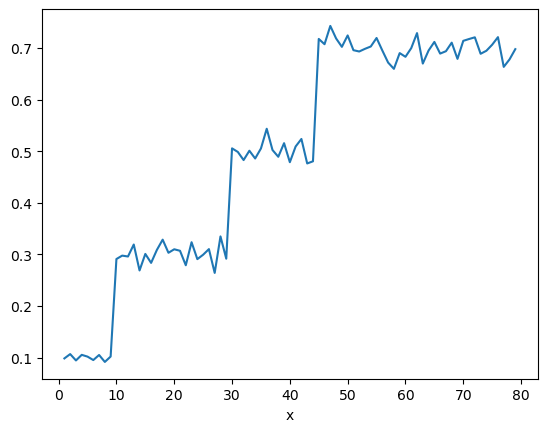

In [13]:
testdata.groupby(by='x')['y'].mean().sort_index().plot()

In [14]:
result,sentence=ChiMerge3(testdata,100,[0,1],pvalue_edge=0.01)
result

****************************************
最终相邻区间的pvalue值为：
[8.30017257e-274 3.05475904e-183 3.05475904e-183]
****************************************


,interval,0,1
0,x<=9.000000,9000,1000
1,x>9.000000 and x<=29.000000,7000,3000
2,x>29.000000 and x<=44.000000,5000,5000
3,x>44.000000,3000,7000


In [15]:
import pandas as pd

data = pd.Series([15, 20, 35, 50, 75, 90, 100])

# 定义分箱的边界
# 注意：这里的边界是左闭右开的，即包含左边界，不包含右边界
bins = [0, 20, 50, 80, 110]
data_binned = pd.cut(data, bins, labels=['低', '中', '较高', '高'])

# 输出分箱后的结果
print(data_binned)


0     低
1     低
2     中
3     中
4    较高
5     高
6     高
dtype: category
Categories (4, object): ['低' < '中' < '较高' < '高']


# 数据不平衡

In [16]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成模拟的不平衡数据集
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# 输出原始和过采样后的类别分布
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_resample))

Original dataset shape Counter({1: 628, 0: 72})
Resampled dataset shape Counter({1: 628, 0: 628})


In [18]:
# 上采样（复制少数类的样本）
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resample, y_resample = ros.fit_resample(X_train, y_train)

In [20]:
# 下采样（随机选择多数类的样本）
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=0,replacement=True) #replacement=True表示放回的抽样，False表示不放回的抽样
X_resample,y_resample=rus.fit_resample(X_train, y_train)

In [21]:
# SMOTE（线性组合）
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_resample(X_train, y_train)

In [22]:
# 改进的SMOTE（注重边界样本
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [23]:
# ADASYN（根据局部密度自适应生成样本
from imblearn.over_sampling import ADASYN

X_resample, y_resample = ADASYN().fit_resample(X_train, y_train)

> **多次过采样**（放回采样，这样产生的训练集才相互独立）产生多个不同的训练集，进而训练多个不同的分类器，通过组合多个分类器的结果得到最终的结果。简单的最佳实践是建立n个模型，每个模型使用少数类的所有样本和多数类的n个不同样本。
> 假设二分类数据集的正负类比例为50000:1000，最后要得到10个模型，那么将保留负类的1000个样本，并随机采样得到10000个正类样本。
> 然后，将10000个样本成10份，每一份与负类样本组合得到新的子训练集，训练10个不同的模型

In [28]:
# EasyEnsemble，利用模型融合的方法（Ensemble)
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier

# 实例化基础分类器，并传递参数
base_estimator = RandomForestClassifier(
    n_estimators=50,  # 例如，森林中的树的数量
    criterion='gini',  # 划分标准
    max_depth=None,  # 树的最大深度
    random_state=42
)

# 创建 EasyEnsembleClassifier 实例，并传递基础分类器
eec = EasyEnsembleClassifier(
    n_estimators=10,  # 集成中分类器的数量
    estimator=base_estimator,  # 指定基础分类器
    sampling_strategy='auto',  # 采样策略,'auto'表示相等；sampling_strategy={0: 100, 1: 200} 表示类别 0 的样本数量将被调整为 100，类别 1 的样本数量将被调整为 200。
    replacement=False,  # 是否重采样
    n_jobs=None,  # 并行任务数，不调整，
    random_state=42,  # 随机状态
    verbose=0  # 是否显示详细日志
)

# 使用 EasyEnsembleClassifier 训练模型
eec.fit(X_train, y_train)

EasyEnsembleClassifier(estimator=RandomForestClassifier(n_estimators=50,
                                                        random_state=42),
                       random_state=42)

> 先通过一次下采样产生训练集，训练一个分类器，对于那些分类正确的多数类样本不放回，然后对这个更小的多数类样本下采样产生训练集，训练第二个分类器，以此类推，最终组合所有分类器的结果得到最终结果。

In [30]:
# BalanceCascade，利用增量训练的思想（Boosting）
from imblearn.ensemble import RUSBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# 实例化基础分类器，并传递参数
base_estimator = RandomForestClassifier(
    n_estimators=50,  # 例如，森林中的树的数量
    criterion='gini',  # 划分标准
    max_depth=None,  # 树的最大深度
    random_state=42
)

# 创建 RUSBoostClassifier 实例，并传递基础分类器
eec = RUSBoostClassifier(
    n_estimators=50,  # 集成中基分类器的数量
    estimator=base_estimator,  # 指定基础分类器
    learning_rate=0.1,
    sampling_strategy='auto',  # 采样策略,'auto'表示相等；sampling_strategy={0: 100, 1: 200} 表示类别 0 的样本数量将被调整为 100，类别 1 的样本数量将被调整为 200。
    replacement=False,  # 是否重采样
    random_state=42,  # 随机状态
)

# 使用 EasyEnsembleClassifier 训练模型
eec.fit(X_train, y_train)

RUSBoostClassifier(estimator=RandomForestClassifier(n_estimators=50,
                                                    random_state=42),
                   learning_rate=0.1, random_state=42)

# 数据缺失

In [8]:
import pandas as pd
import numpy as np

# 创建一个示例 DataFrame
np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.choice([1, 2, 3, np.nan], size=100, p=[0.1, 0.2, 0.3, 0.4]),
    'B': np.random.choice([1, 2, 3, np.nan], size=100, p=[0.2, 0.3, 0.1, 0.4]),
    'C': np.random.choice([1, 2, 3, np.nan], size=100, p=[0.3, 0.2, 0.1, 0.4]),
    'D': np.random.choice([1, 2, 3, np.nan], size=100, p=[0.4, 0.2, 0.1, 0.3])
})
df['DD'] = df['D'] * 2 
df

,A,B,C,D,DD
0,3.0,NaN,2.0,NaN,NaN
1,NaN,2.0,NaN,NaN,NaN
2,NaN,NaN,2.0,1.0,2.0
3,3.0,NaN,1.0,1.0,2.0
4,3.0,2.0,1.0,2.0,4.0
...,...,...,...,...,...
95,2.0,2.0,1.0,NaN,NaN
96,3.0,2.0,1.0,1.0,2.0
97,1.0,2.0,NaN,1.0,2.0
98,NaN,1.0,NaN,1.0,2.0


> 相关系数很小的是完全随机缺失MCAR；有一个相关性很大的是随机缺失MAR；缺失以来于缺失列本身的是非随机缺失MNAR

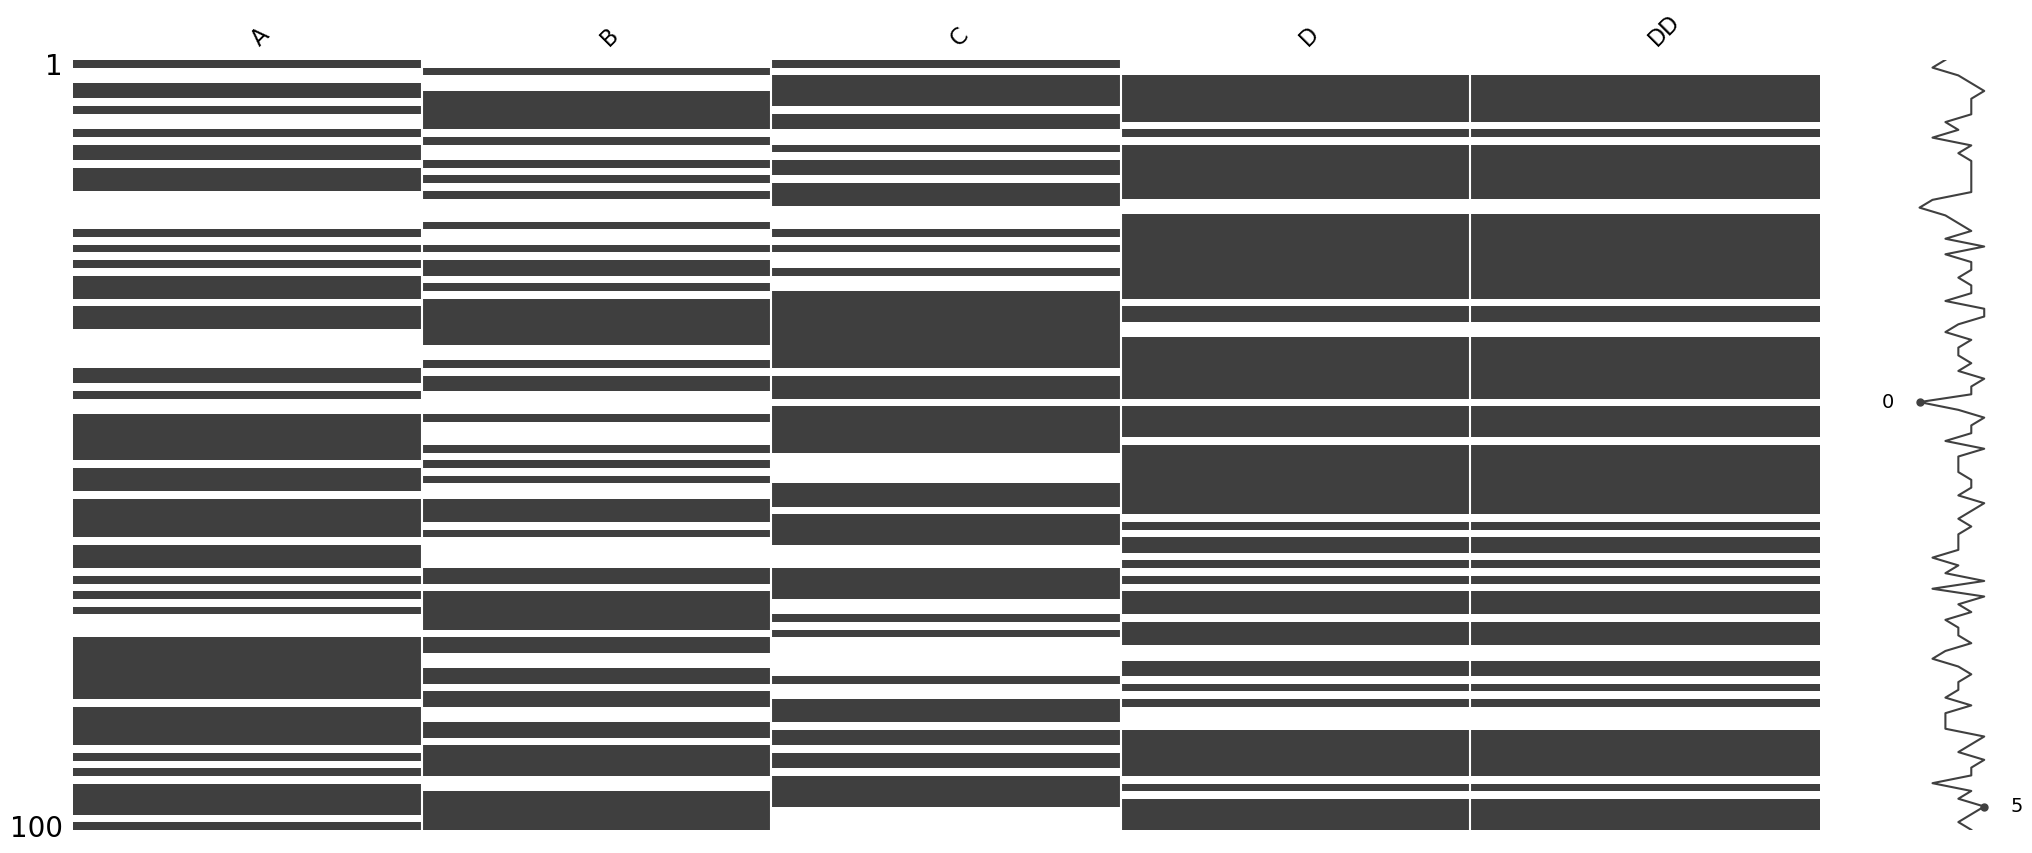

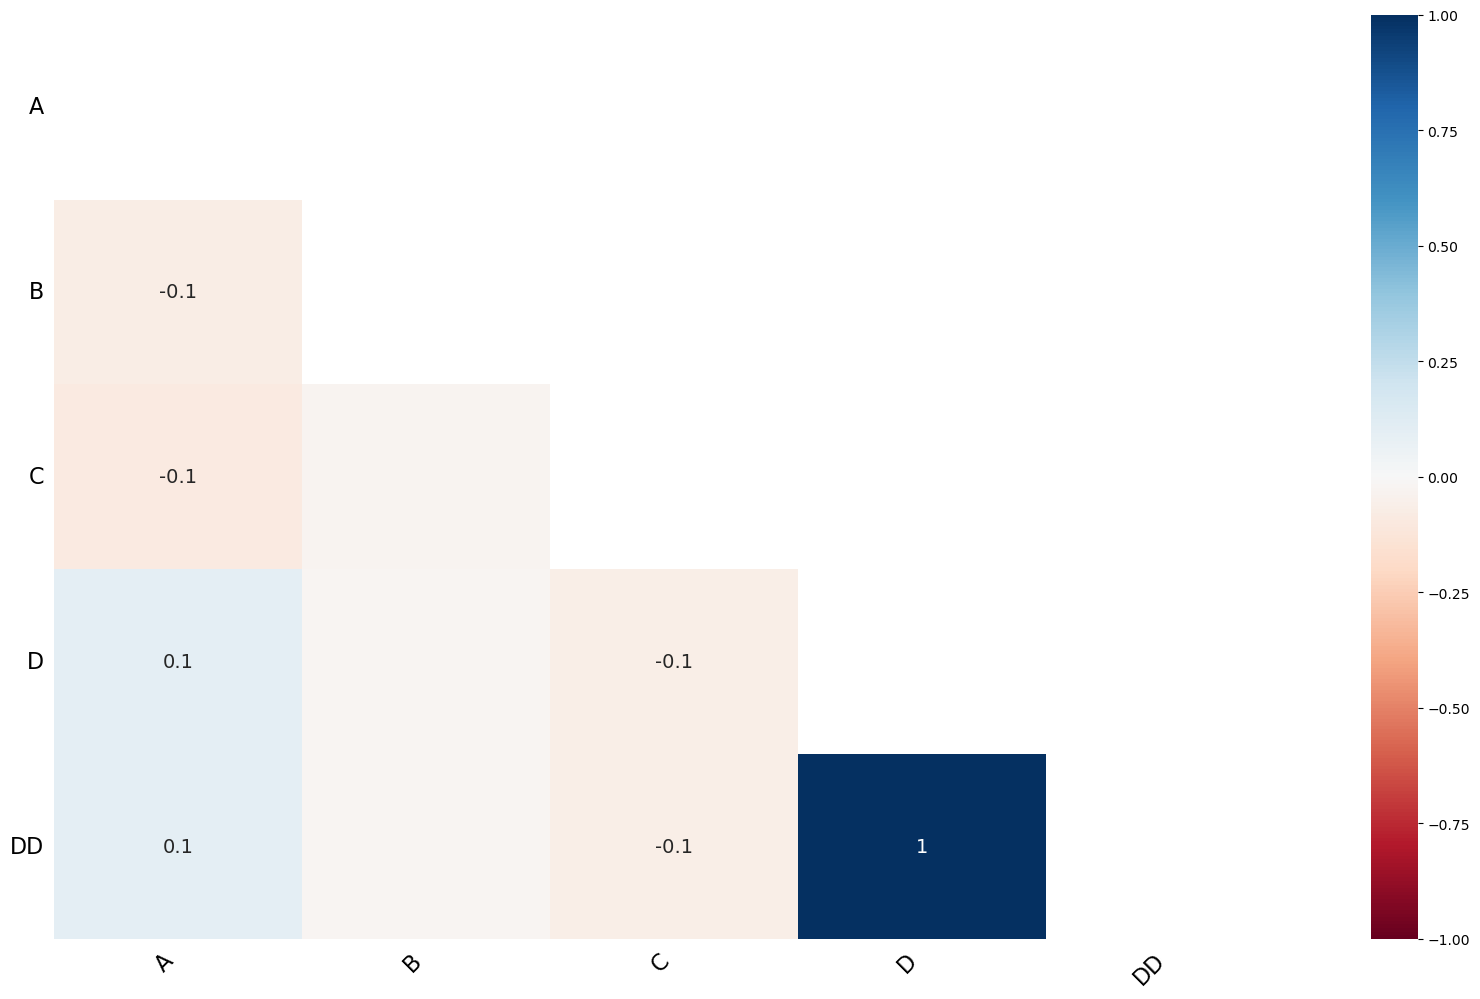

In [5]:
# 缺失值可视化
import missingno as msno
import matplotlib.pyplot as plt

# 1. 使用散点图来观察缺失数据的模式
msno.matrix(df)
plt.show()

# 2. 使用热图来观察缺失数据的模式
msno.heatmap(df)
plt.show()

C:\Users\zjq\AppData\Local\Temp\ipykernel_248\2190427924.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_missing_in_A['D'], ax=axes[0], shade=True, color="r", label="Missing in A")
C:\Users\zjq\AppData\Local\Temp\ipykernel_248\2190427924.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_non_missing_in_A['D'], ax=axes[1], shade=True, color="b", label="Non-Missing in A")


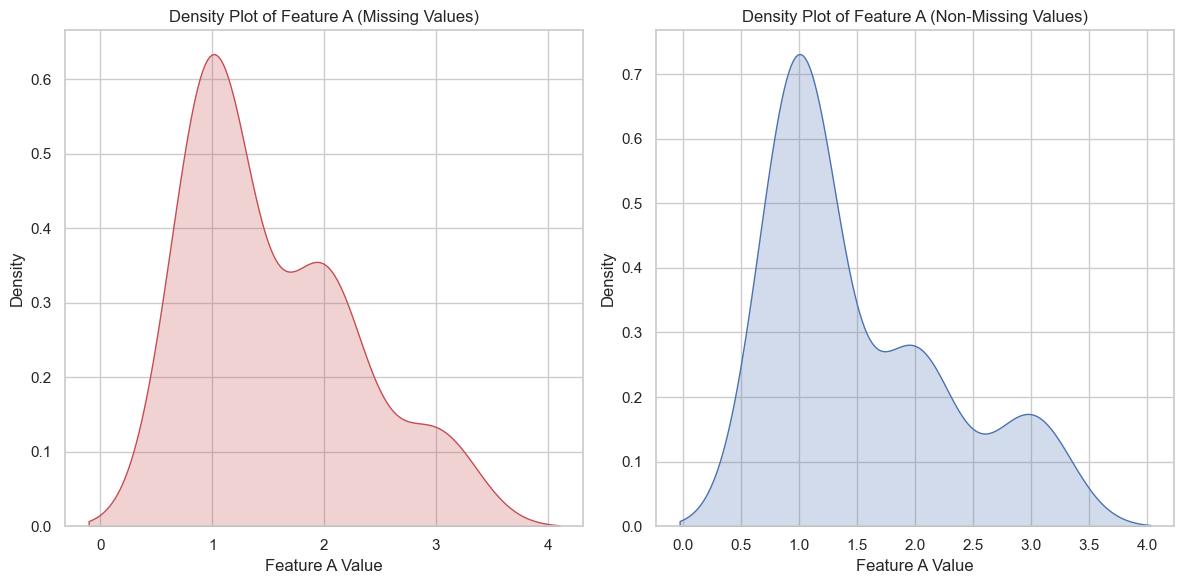

In [14]:
# 缺失与不缺失相应地在目标中的分布
import seaborn as sns
import matplotlib.pyplot as plt

df_missing_in_A = df[df['A'].isnull()]
df_non_missing_in_A = df[df['A'].notnull()]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.kdeplot(df_missing_in_A['D'], ax=axes[0], shade=True, color="r", label="Missing in A")
axes[0].set_title('Density Plot of Feature A (Missing Values)')
axes[0].set_xlabel('Feature A Value')
sns.kdeplot(df_non_missing_in_A['D'], ax=axes[1], shade=True, color="b", label="Non-Missing in A")
axes[1].set_title('Density Plot of Feature A (Non-Missing Values)')
axes[1].set_xlabel('Feature A Value')
plt.tight_layout()
plt.show()

# 相关性

## 分类变量的相关性

## 以下三种方式的原假设都是独立的

> 卡方检验（Chi-Square Test）是一种统计方法，用于确定两个**分类变量**之间是否存在显著的关联。
>
> 注意事项：
> 卡方检验适用于分类数据，且每个单元格的期望频数应大于5,总数大于40，否则可能需要使用其他检验（如Fisher精确检验）。
> 如果频数小于5，大于0，但是总数大于40，用连续性校正的卡方检验。例如：Yates校正
> 卡方检验只能告诉我们变量之间是否存在关联，但不能告诉我们关联的强度或方向。


https://blog.csdn.net/weixin_39982225/article/details/104875676?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522172286119016800207024857%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=172286119016800207024857&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-104875676-null-null.142^v100^pc_search_result_base6&utm_term=%E5%88%86%E7%B1%BB%E5%8F%98%E9%87%8F%E7%9A%84%E7%9B%B8%E5%85%B3%E5%88%86%E6%9E%90&spm=1018.2226.3001.4187

In [3]:
# 频数表的绘制
import pandas as pd

# 假设这是你的数据
data = {
    'x': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'A', 'B', 'C'],
    'y': ['X', 'X', 'Y', 'Y', 'X', 'Y', 'Y', 'X', 'X', 'Y']
}
df = pd.DataFrame(data)


frequency_table = pd.crosstab(df['x'], df['y'], margins=True)  #, margins=True表示生成边际总和的频数表
print(frequency_table)

y    X  Y  All
x             
A    2  2    4
B    3  0    3
C    0  3    3
All  5  5   10


In [2]:
import numpy as np
from scipy.stats import chi2_contingency

# 示例列联表
contingency_table = np.array([[50, 20],  # 男性喜欢/不喜欢
                              [45, 35]]) # 女性喜欢/不喜欢

# 执行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 输出结果
print("卡方统计量:", chi2)
print("P值:", p)
print("自由度:", dof)
print("期望频数:\n", expected)

# 做出结论
alpha = 0.05  # 显著性水平
if p < alpha:
    print("在显著性水平 %.2f 下，拒绝零假设，认为变量之间存在关联。" % alpha)
else:
    print("在显著性水平 %.2f 下，不能拒绝零假设，认为变量之间独立。" % alpha)


卡方统计量: 3.0790755297334242
P值: 0.07930559187173501
自由度: 1
期望频数:
 [[44.33333333 25.66666667]
 [50.66666667 29.33333333]]
在显著性水平 0.05 下，不能拒绝零假设，认为变量之间独立。


> Fisher精确检验不是基于连续分布（如t分布或正态分布）的，而是基于超几何分布来计算精确概率。  
> 超过20%的交叉表元素的期望值小于5或者至少存在一个交叉表元素的期望值小于1。  
> 卡方和fisher可以用SPSS

In [4]:
# Fisher精确检验
from scipy.stats import fisher_exact

# 示例列联表
contingency_table = [[1, 9],  # 男性喜欢/不喜欢
                     [11, 3]] # 女性喜欢/不喜欢

# 执行Fisher精确检验
oddsratio, p_value = fisher_exact(contingency_table)
print("Odds Ratio:", oddsratio)
print("P值:", p_value)

alpha = 0.05  # 显著性水平
if p_value < alpha:
    print("在显著性水平 %.2f 下，拒绝零假设，认为变量之间存在关联。" % alpha)
else:
    print("在显著性水平 %.2f 下，不能拒绝零假设，认为变量之间独立。" % alpha)

Odds Ratio: 0.030303030303030304
P值: 0.0027594561852200836
在显著性水平 0.05 下，拒绝零假设，认为变量之间存在关联。


> 在2x2列联表中，当样本量较小，特别是当某些单元格的期望频数小于5时，使用标准的Pearson卡方检验可能会导致第一类错误（错误地拒绝零假设）的概率增加。Yates校正通过调整卡方统计量的计算方式来减少这种偏差。

In [8]:
# Yates校正检验
import numpy as np
from scipy.stats import chi2_contingency

# 示例2x2列联表
contingency_table = np.array([[1, 2],  # 类别1
                              [2, 40]]) # 类别2

# 执行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 应用Yates校正
chi2_yates = sum((np.abs(contingency_table - expected) - 0.5)**2 / expected)

# 输出结果
print("Yates校正的卡方统计量:", chi2_yates)
print("P值:", p)

Yates校正的卡方统计量: [0.48214286 0.03443878]
P值: 0.4723035139984406


Cochran-Mantel-Haenszel检验（简称CMH检验）是一种用于研究两个分类变量之间关联性的统计检验方法。这种方法特别适用于存在第三个分类变量（混杂变量）的情况，可以用来分析分层样本。
> 相关网站使用方法见下第一个；相关网站见第二个

https://blog.csdn.net/m0_37228052/article/details/123009231?ops_request_misc=&request_id=&biz_id=102&utm_term=CMH%E6%A3%80%E9%AA%8C%20SPSS&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-123009231.142^v100^pc_search_result_base6&spm=1018.2226.3001.4187

https://blog.csdn.net/Una20200519/article/details/122058322?ops_request_misc=&request_id=&biz_id=102&utm_term=CMH%E6%A3%80%E9%AA%8C%20SPSS&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-6-122058322.142^v100^pc_search_result_base6&spm=1018.2226.3001.4187

# 有序序列

## Kendall’s tau-b（肯德尔）等级相关系数

相关概念的解释：https://blog.csdn.net/weixin_52040570/article/details/140008962?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522172317460616800175719820%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=172317460616800175719820&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-1-140008962-null-null.142^v100^pc_search_result_base6&utm_term=Kendall%E2%80%99s%20tau-b%EF%BC%88%E8%82%AF%E5%BE%B7%E5%B0%94%EF%BC%89%E7%AD%89%E7%BA%A7%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0&spm=1018.2226.3001.4187

> 这种方法更加适合在两个变量是分类的有序序列，但是存在大量数据，在某一个变量上取值是相同的

In [9]:
import scipy.stats as stats

# 假设我们有两个列表，分别代表两个变量的等级
variable1 = [1, 2, 3, 3, 2, 1, 2, 3, 1, 2]
variable2 = [3, 2, 1, 1, 3, 2, 2, 1, 3, 3]

# 使用scipy.stats中的kendalltau函数计算肯德尔tau-b和相关性的p值
tau, p_value = stats.kendalltau(variable1, variable2)

# 输出结果
print(f'肯德尔tau-b值: {tau}')
print(f'相关性的p值: {p_value}')
# 原假设是两变量相互独立

肯德尔tau-b值: -0.696969696969697
相关性的p值: 0.01915234303746008


## Mantel-Haenszel 趋势检验

# 分类-连续的相关性

## Point-biserial相关性分析

Point-biserial相关性分析是一种统计方法，用于评估一个二分变量和一个连续变量之间的相关性。在这种情况下，二分变量通常代表“是”或“否”的结果，而连续变量则代表一个可以量化测量的变量。
> 按照相关的方法，也可以使用T检验

> Point-biserial相关性分析的计算涉及以下步骤：

>计算每个类别（通常是“是”和“否”）的平均值。  
>计算每个类别与连续变量的协方差。  
>计算二分变量的方差。  
>应用公式计算Point-biserial相关系数  

In [11]:
import numpy as np
from scipy.stats import pointbiserialr

# 假设我们有二分变量（0代表否，1代表是）和连续变量
binary_variable = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
continuous_variable = [34, 76, 88, 55, 24, 64, 100, 88, 90, 45]

# 使用pointbiserialr计算Point-biserial相关系数
correlation, p_value = pointbiserialr(binary_variable, continuous_variable)

# 输出结果
print(f'Point-biserial相关系数: {correlation}')
print(f'相关性的p值: {p_value}')
# 原假设两个变量相互独立

Point-biserial相关系数: 0.6934356498299659
相关性的p值: 0.026163090135208192


## ANOVA(方差分析)

> 假设
> 
>方差齐性：各组样本的方差应该相等。  
>独立性：每个样本中的观测值应该是独立的。  
>正态性：每个样本的数据应该近似正态分布。  

# 聚类

https://blog.csdn.net/Java_college/article/details/136173448?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522172318996016800211571901%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=172318996016800211571901&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-136173448-null-null.142^v100^pc_search_result_base6&utm_term=%E8%81%9A%E7%B1%BB%E6%96%B9%E6%B3%95&spm=1018.2226.3001.4187

## k-means聚类

要求数据是凸集

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


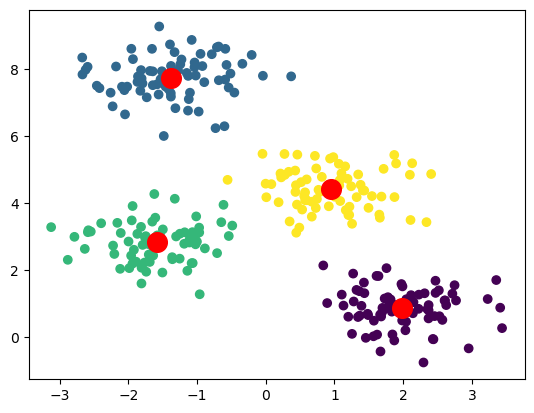

In [24]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
# 创建一个示例数据集
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
 
# 使用K均值算法进行聚类
kmeans = KMeans(n_clusters=4)#这里设定聚成的簇的大小
kmeans.fit(X)
 
# 获取簇中心和簇分配结果
centers = kmeans.cluster_centers_
labels = kmeans.labels_
 
# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=200, color='red')
plt.show()

## 层次聚类

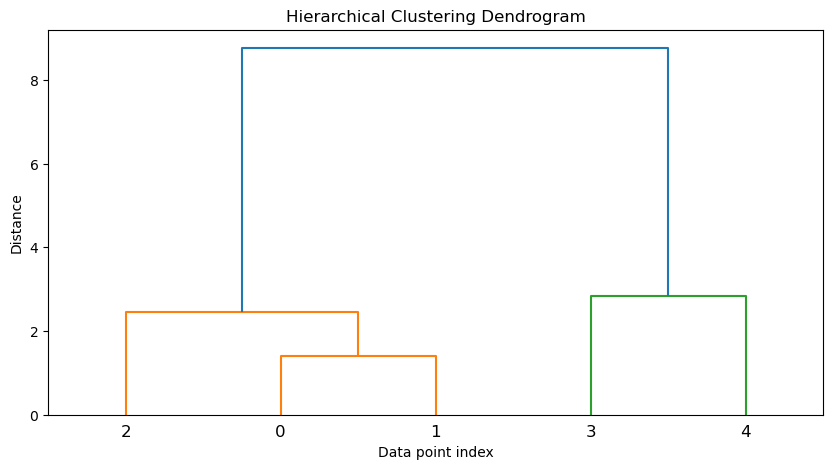

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
 
# 创建示例数据集
X = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [7, 8]])
 
# 计算链接矩阵
Z = linkage(X, 'ward')
 
# 绘制树状图
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()

>‘ward’: 使用ward最小方差方法。这种方法通过最小化每个合并步骤中的方差增加来选择合并的顺序。  
>‘complete’: 使用完全连接方法。这种方法选择两个簇之间最远的两个点之间的距离作为簇之间的距离。  
>‘average’: 使用平均连接方法。这种方法选择两个簇之间所有成对点之间的平均距离作为簇之间的距离。  
>‘single’: 使用单连接方法。这种方法选择两个簇之间最近的两个点之间的距离作为簇之间的距离。  

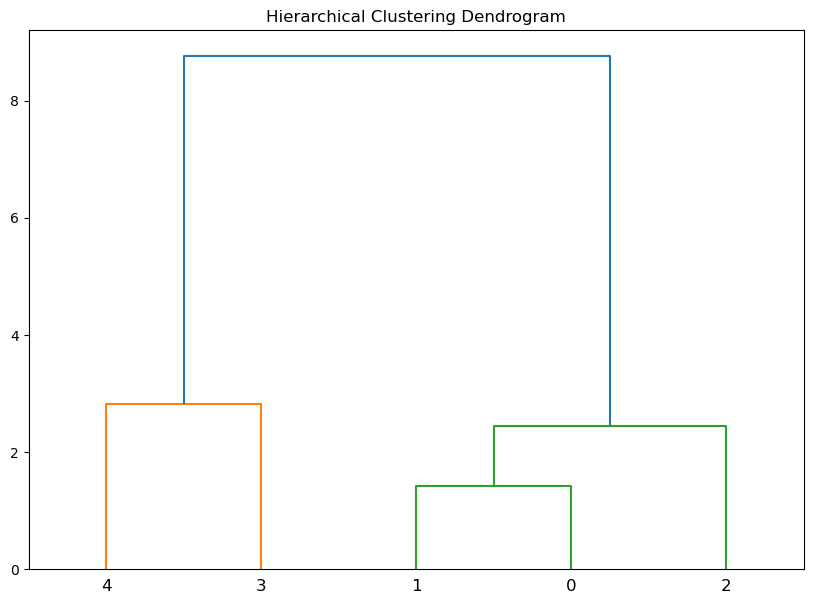

In [31]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

X = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [7, 8]])

# linkage参数定义了用于计算距离的链接策略，例如'ward', 'complete', 'average', 'single'
# n_clusters决定了最终聚类结果中类别的数量
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
clustering.fit(X)
labels = clustering.labels_

linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## DBSCAN

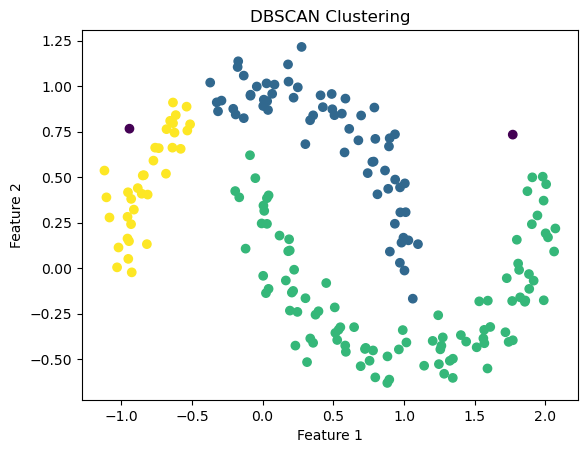

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
 
# 创建示例数据集
X, _ = make_moons(n_samples=200, noise=0.1)
 
# 使用DBSCAN算法进行聚类
dbscan = DBSCAN(eps=0.2, min_samples=5)#设置领域大小和最小阈值
labels = dbscan.fit_predict(X)
 
# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 谱聚类

将所有点的邻接矩阵构造一个图，利用每次分割找最小的分割边的情况聚类的思想

https://blog.csdn.net/yc_1993/article/details/52997074?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522172319452216800185873894%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=172319452216800185873894&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-52997074-null-null.142^v100^pc_search_result_base6&utm_term=%E8%B0%B1%E8%81%9A%E7%B1%BB&spm=1018.2226.3001.4187

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


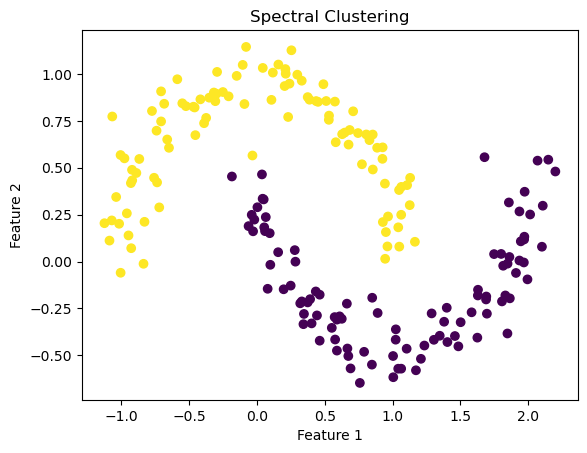

In [28]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
 
# 创建示例数据集
X, _ = make_moons(n_samples=200, noise=0.1)
 
# 使用谱聚类进行聚类
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)#聚类的数量
labels = spectral_clustering.fit_predict(X)
 
# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 高斯混合模型

要求数据为高斯分布

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


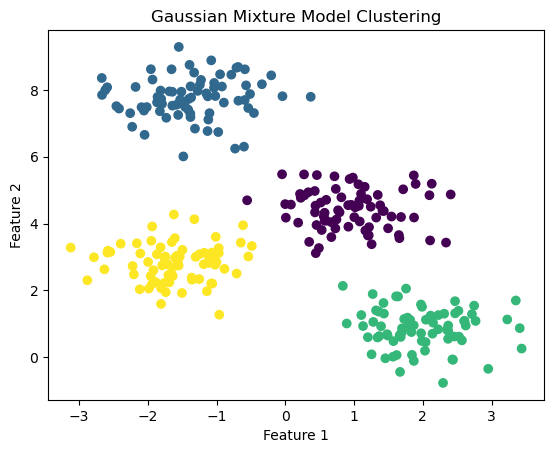

In [30]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
 
# 创建示例数据集
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
 
# 使用GMM算法进行聚类
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
 
# 获取聚类结果
labels = gmm.predict(X)
 
# 绘制聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

用层次聚类计算相似度（距离的倒数）
矩阵中的数字代表的是输入的值，然后在行的方向上和列的方向上进行聚类

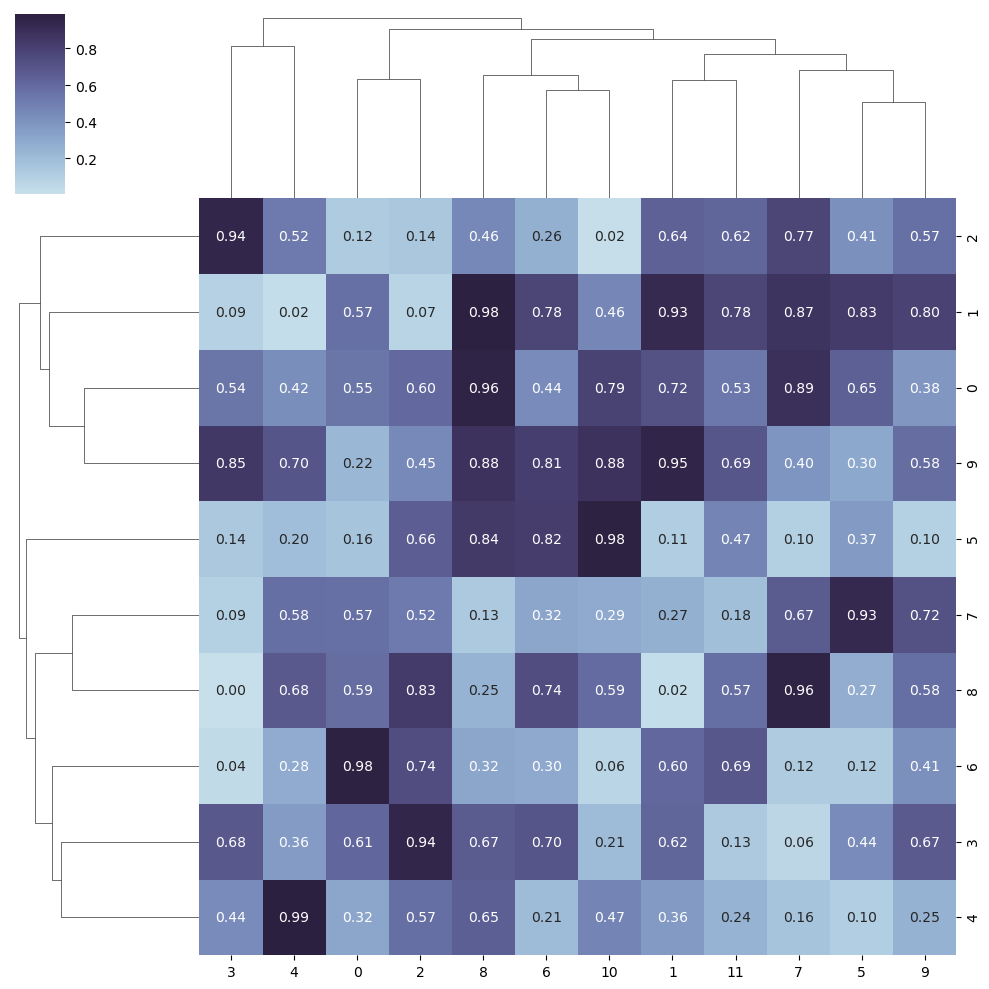

In [2]:
# 分组聚类热力图
import seaborn as sns
import numpy as np
np.random.seed(0)
uniform_data = np.random.rand(10, 12)
ax = sns.clustermap(uniform_data, 
                 center=0.5,#center表示中心颜色对应系数多少
                 annot=True, #表示显示数字
                 fmt=".2f", #表示保留两个小数
                 cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
                )